# **Projet d'analyse d'une facture**

L'objetif de ce projet est de lire une facture et repondre aux questions ci desous en utilisant deux approches.

    1) L'approche tradictionnelle
    2) Un modèle pré entrainé pour repondre

# Questions:

    1) how many invoice items are listed?
    2) what's the tax ratio applied?
    3)  can you give the sum of the growth worth of the two fist items?

In [3]:
import pdfplumber
import pandas as pd

In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.9 MB/s eta 0:00:00


# Importation de la facture

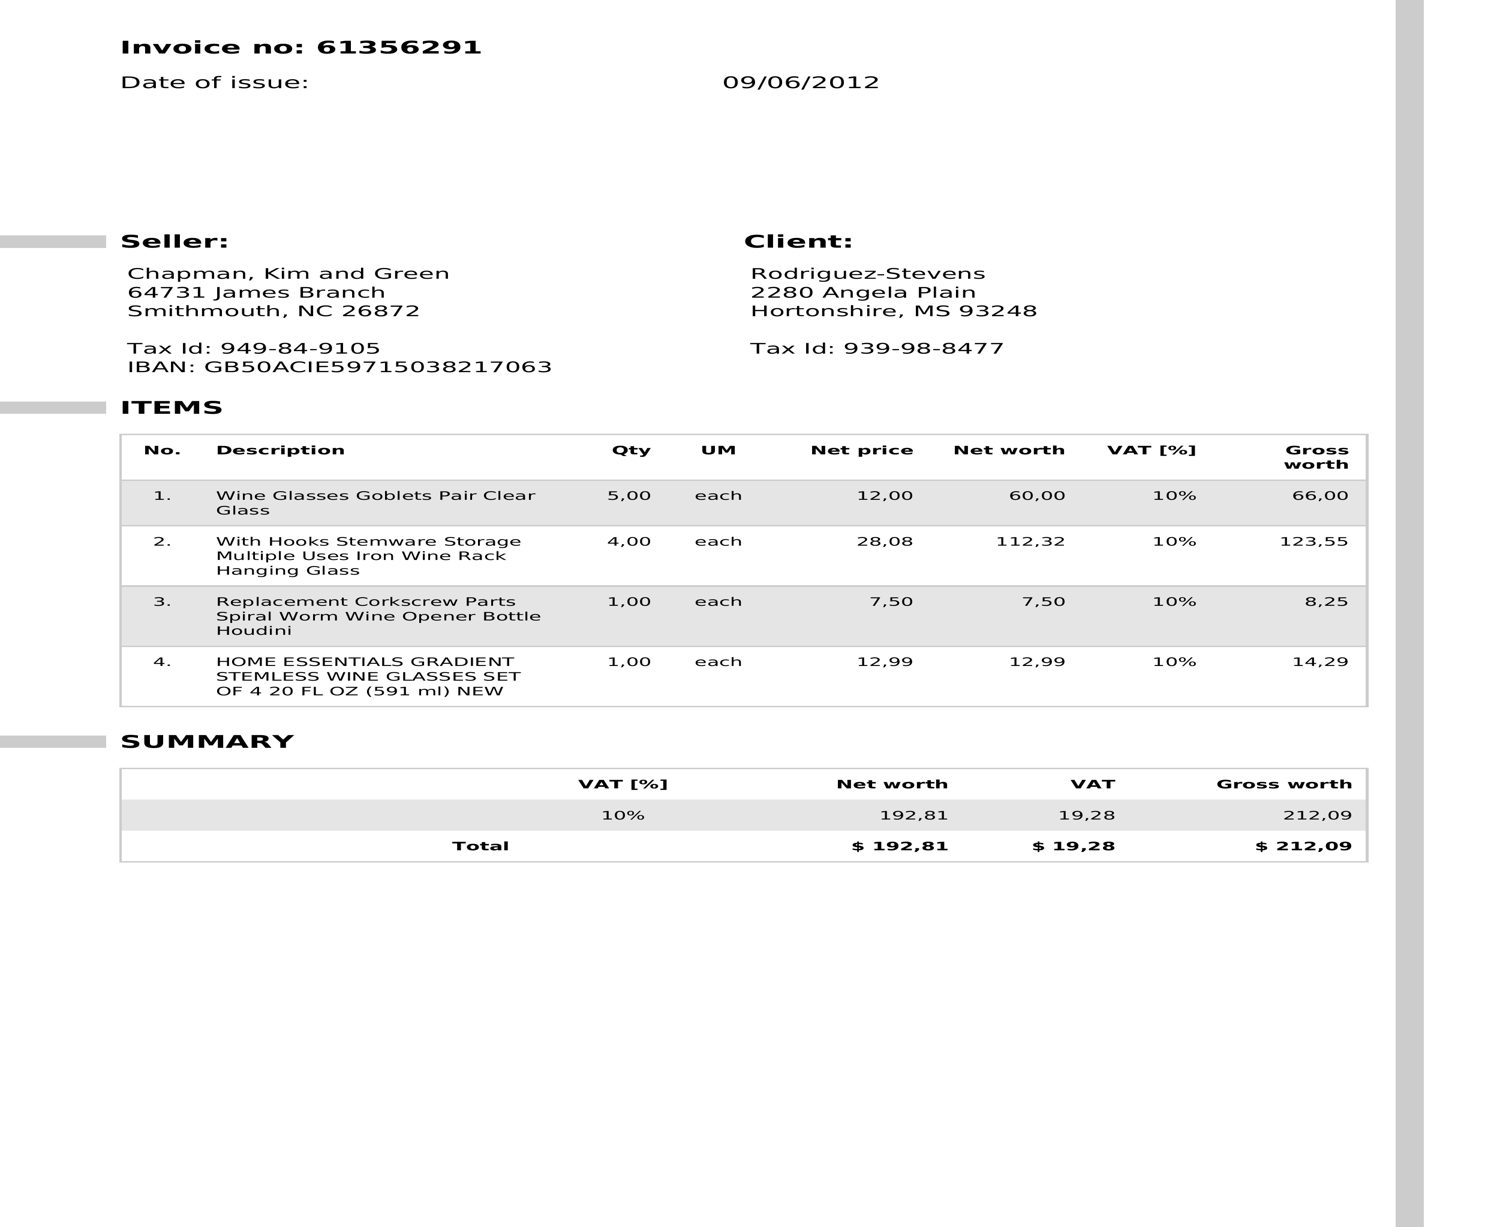

In [21]:
from PIL import Image
import time

# Ouvrir l'image du PDF (vous devrez peut-être convertir le format d'image si nécessaire)
image_path = '/content/invoice.png'
img = Image.open(image_path)

# Redimensionner l'image à une taille spécifique (par exemple, 50% de la taille d'origine)
largeur, hauteur = img.size
img_redimensionnee = img.resize((int(largeur * 0.6), int(hauteur * 0.35)))
img_redimensionnee


In [23]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,444 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

# Extraction du texte de la faccture

In [24]:
import pytesseract
# Utiliser Tesseract pour extraire le texte de l'image en spécifiant le mode de segmentation de la page (--psm 6)
text = pytesseract.image_to_string(img, config='--psm 6')

# Afficher le texte extrait
print(text)


Invoice no: 61356291
Date of issue: 09/06/2012
Seller: Client:
Chapman, Kim and Green Rodriguez-Stevens
64731 James Branch 2280 Angela Plain
Smithmouth, NC 26872 Hortonshire, MS 93248
Tax Id: 949-84-9105 Tax Id: 939-98-8477
IBAN: GB50ACIE59715038217063
ITEMS
No. Description Qty UM Net price Net worth VAT [%] Gross
worth
1. Wine Glasses Goblets Pair Clear 5,00 each 12,00 60,00 10% 66,00
Glass
2. With Hooks Stemware Storage 4,00 each 28,08 112,32 10% 123,55
Multiple Uses Iron Wine Rack
Hanging Glass
3. Replacement Corkscrew Parts 1,00 each 7,50 7,50 10% 8,25
Spiral Worm Wine Opener Bottle
Houdini
4. HOME ESSENTIALS GRADIENT 1,00 each 12,99 12,99 10% 14,29
STEMLESS WINE GLASSES SET
OF 4 20 FL OZ (591 ml) NEW
SUMMARY
VAT [%] Net worth VAT Gross worth
10% 192,81 19,28 212,09
Total $ 192,81 $ 19,28 $ 212,09



# Formatage et structuration des données pour insertion dans un dataframe

In [25]:
import pandas as pd
import re

def extract_items(text):
    # Utiliser des expressions régulières pour extraire les informations des articles
    items_pattern = r"\d+\.\s(.*?)\s+(\d+,\d+)\s+(\w+)\s+(\d+,\d+)\s+(\d+,\d+)\s+(\d+%)\s+(\d+,\d+)"

    matches = re.findall(items_pattern, text, re.DOTALL)
    if matches:
        columns = ['Description', 'Qty', 'UM', 'Net Price', 'Net Worth', 'VAT', 'Gross Worth']
        items_df = pd.DataFrame(matches, columns=columns)
        return items_df
    else:
        return None


In [26]:

# Extraire les informations des articles
items_df = extract_items(text)
items_df.head()

,Description,Qty,UM,Net Price,Net Worth,VAT,Gross Worth
0,Wine Glasses Goblets Pair Clear,"5,00",each,"12,00","60,00",10%,"66,00"
1,With Hooks Stemware Storage,"4,00",each,"28,08","112,32",10%,"123,55"
2,Replacement Corkscrew Parts,"1,00",each,"7,50","7,50",10%,"8,25"
3,HOME ESSENTIALS GRADIENT,"1,00",each,"12,99","12,99",10%,"14,29"


In [28]:
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 15.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 1) Reponse aux questions en utilisant l'approche traditionnelle

In [ ]:
import spacy

# Chargement du modèle spaCy
nlp = spacy.load("fr_core_news_sm")

# Fonction pour extraire les informations clés
def extract_information(text):
    # Utiliser des expressions régulières pour extraire les informations spécifiques
    # Exemple : Numéro de facture
    invoice_number_match = re.search(r"Invoice no: (\d+)", text)
    invoice_number = invoice_number_match.group(1) if invoice_number_match else None

    # Utiliser spaCy pour l'analyse sémantique
    doc = nlp(text)

    # Exemple : Entités nommées (Noms de vendeur et de client)
    sellers = [ent.text for ent in doc.ents if ent.label_ == "ORG"]
    clients = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

    # Exemple : Extraction des informations sur les articles
    items_pattern = r"(\d+\.\s(.*?)\s+(\d+,\d+)\s+(\w+)\s+(\d+,\d+)\s+(\d+,\d+)\s+(\d+%)\s+(\d+,\d+))"
    items_matches = re.findall(items_pattern, text, re.DOTALL)

    items_list = []
    for match in items_matches:
        items_list.append({
            "Description": match[1],
            "Qty": match[2],
            "UM": match[3],
            "NetPrice": match[4],
            "NetWorth": match[5],
            "VAT": match[6],
            "GrossWorth": match[7]
        })

    return {
        "InvoiceNumber": invoice_number,
        "Sellers": sellers,
        "Clients": clients,
        "Items": items_list,
        # Ajoutez d'autres informations clés...
    }

In [ ]:
# Fonction pour répondre aux questions spécifiques
def answer_questions(information):
    num_items = len(information.get("Items", []))

    # Calcul du taux de taxe
    total_net_worth = sum(float(item["NetWorth"].replace(",", ".")) for item in information.get("Items", []))
    total_vat = sum(float(item["VAT"].replace("%", "")) for item in information.get("Items", []))
    tax_ratio = (total_vat / total_net_worth) * 100 if total_net_worth != 0 else 0

    # Calcul de la somme de la valeur brute des deux premiers articles
    sum_first_two_items = (
        float(information.get("Items", [])[0]["GrossWorth"].replace(",", ".")) +
        float(information.get("Items", [])[1]["GrossWorth"].replace(",", "."))
    )

    return {
        "NumberofItems": num_items,
        "TaxRatio": tax_ratio,
        "SumofFirstTwoItemsGrossWorth": sum_first_two_items
    }

In [39]:
# Utilisation des fonctions
information = extract_information(text)
answers = answer_questions(information)

# Affichage des réponses
print("Réponses aux questions :")
print(f"1) how many invoice items are listed?: {answers['NumberofItems']}")
print(f"2) what's the tax ratio applied?: {answers['TaxRatio']}%")
print(f"3) can you give the sum of the growth worth of the two fist items?: {answers['SumofFirstTwoItemsGrossWorth']}")


Réponses aux questions :
1) how many invoice items are listed?: 4
2) what's the tax ratio applied?: 20.74581193921477%
3) can you give the sum of the growth worth of the two fist items?: 189.55


# 2) Entraînement d'un modèle pré-entraîné pour répondre aux questions.

In [30]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import pipeline

# Fonction pour répondre aux questions
def answer_questions(text, questions):
    # Initialiser le modèle et le tokenizer
    model_name = "t5-base"
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)

    # Prétraiter le texte et les questions
    inputs = [f"Répondre à la question: {question} Contexte: {text}" for question in questions]
    inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True)

    # Générer les réponses
    outputs = model.generate(**inputs)

    # Décoder les réponses
    decoded_responses = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return decoded_responses


In [37]:
# Questions
questions = [
    "how many invoice items are listed?",
    "what's the tax ratio applied?",
    "can you give the sum of the growth worth of the two fist items?"
]

# Charger le modèle de questions-réponses
question_answering_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad", tokenizer="distilbert-base-cased-distilled-squad")

# Obtenir les réponses
responses = []
for question in questions:
    result = question_answering_pipeline(question=question, context=text)
    responses.append(result["answer"])

In [36]:
# Afficher les réponses
for i, response in enumerate(responses, 1):
    print(f"Réponse à la question {i}: {response}")

Réponse à la question 1: 61356291
Réponse à la question 2: 949-84-9105
Réponse à la question 3: Gross


Le modèle n'est parfait à cause de la quantité de données !!

# Merci !!!!!